In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as spl
import scipy.linalg as la
import scipy.integrate as integrate
import numpy.polynomial.legendre as lgd
import scipy.misc as misc
from math import pi,fac

In [11]:
#Polynomial approximation order 
N = 15

In [20]:


def alpha(j,k):
    return (np.power(-1,k)*misc.factorial(2*i-2*k))/(misc.factorial(k)*misc.factorial(i-k)*misc.factorial(i-2*k))

def term1(i,x,l,m,n):
    fVal = 0.0
    for k in range(int(np.floor(i/2.0)) + 1):
        for j in range(i-2*k):
            fVal = fVal + (1-np.power(-1,i-j))*(alpha(i,k)/float((i-2*k-j)))*np.power(x,j+1)*spl.hyp2f1(0.5,float((j+1)/2.0),float((j+3)/2.0),x**2)/(float(j+1))
    return fVal*l*m*n/(float(np.power(2,i)))

def term2(i,x,l,m,n):
    f = lambda x,i: spl.eval_legendre(i,x)*np.log((1-x)/(1+x))/(1-x**2)
    fVal = integrate.quad(f,-1.0,x,args=(i))[0]
    return l*m*n*fVal

def term3(x):
    return np.sqrt(1-x**2)

In [21]:
A = np.zeros(shape=(N,N))
b = np.zeros(shape=(N,1))

In [22]:
x_eqn = np.linspace(-1,1,N+2)[1:N+1]
for i in range(N):
    for j in range(N):
        A[i,j] = term0(j,x_eqn[i]) + term1(j,x_eqn[i],l,m,n) + term2(j,x_eqn[i],l,m,n)
    b[i] = np.sqrt(1-x_eqn[i]**2)

In [23]:
c = la.solve(A,b)

In [24]:
xd = np.linspace(-1.0,1.0,100)[1:99]
phix = lgd.legval(xd,c)
vx = phix/(np.sqrt(1-xd**2))
vxTest = np.sqrt(1-xd**2)

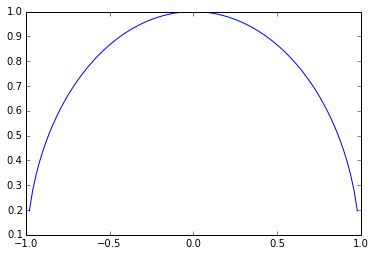

In [25]:
plt.plot(xd,vx.T)